
## Lab: Linear regression, tuning models

In this lab we will continue to perform linear regression using the CPU data set.
Before starting the lab, you may want to download 'An Introduction to Statistical Learning' by 
James et al, which is made available by the authors for free as a PDF.  It uses R, not Python, 
but is a great resource for data science:
https://www.statlearning.com/ and https://hastie.su.domains/ISLR2/ISLRv2_website.pdf
Now let's start the lab.  Create a new Python file and write code for the following steps.


1. Read the CPU data:

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2) # clock speed in MHz 

2. Split the data randomly into a training set and a test set, using a 70/30 split (70% training 
data).  Use train_test_split.  


In [9]:
X = df[['erp', 'cs', 'cach', 'myct']]
y = df['prp'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [4]:
df

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
adviser 32/60,125,256,6000,256,16,128,198,199,8.00
amdahl 470v/7,29,8000,32000,32,8,32,269,253,34.48
amdahl 470v/7a,29,8000,32000,32,8,32,220,253,34.48
amdahl 470v/7b,29,8000,32000,32,8,32,172,253,34.48
amdahl 470v/7c,29,8000,16000,32,8,16,132,132,34.48
...,...,...,...,...,...,...,...,...,...
sperry 80/8,124,1000,8000,0,1,8,42,37,8.06
sperry 90/80-model-3,98,1000,8000,32,2,8,46,50,10.20
sratus 32,125,2000,8000,0,2,14,52,41,8.00
wang vs-100,480,512,8000,32,0,0,67,47,2.08


3. Use LinearRegression to create a linear model to predict performance (feature ‘prp’).  
Use a couple of predictor variables of your own choice.  Create the model using your 
training set. 


In [10]:
rgr = LinearRegression()
rgr.fit(X,y)

LinearRegression()

4. Compute the MSE of your model on the test data.  Do this manually.


In [11]:
predict = rgr.predict(X_test)
MSE = ((predict - y_test)**2).mean()
MSE

2168.698970379743

5. Repeat steps 2-4, but this time use new randomly-generated test and training sets.  How 
much does the RMSE differ?


In [25]:
X_rand = np.random.randint(low=0, high=1000, size=(209, 4))
Y_rand = np.random.randint(low=6, high=1150, size=209)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rand, Y_rand, test_size=0.3, random_state=42)
rgr.fit(Xr_train, yr_train)
r_predict = rgr.predict(Xr_test)
MSE = ((r_predict - yr_test)**2).mean()
MSE

109976.26389177465

6. If you have time, write code that will do steps 2-4 100 times, each time creating different 
training/test sets.  Collect the computed RMSE values, and plot them on a histogram.


<AxesSubplot: ylabel='Count'>

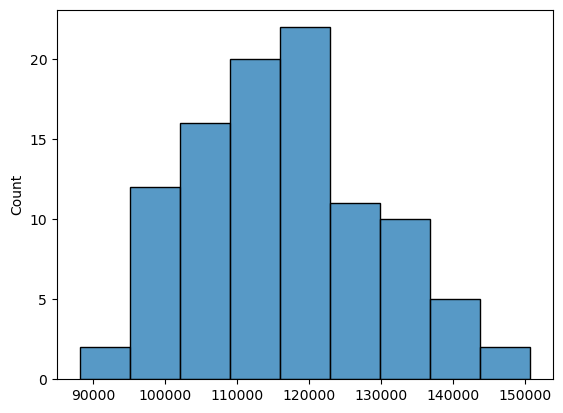

In [26]:
mse = []
for i in range(100):
    X_rand = np.random.randint(low=0, high=1000, size=(209, 4))
    Y_rand = np.random.randint(low=6, high=1150, size=209)
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rand, Y_rand, test_size=0.3, random_state=42)
    rgr.fit(Xr_train, yr_train)
    r_predict = rgr.predict(Xr_test)
    mse.append(((r_predict - yr_test)**2).mean())
sns.histplot(pd.Series(mse))

7. If you still have time, repeat problem 6, but this time use an 80/20 split.


<AxesSubplot: ylabel='Count'>

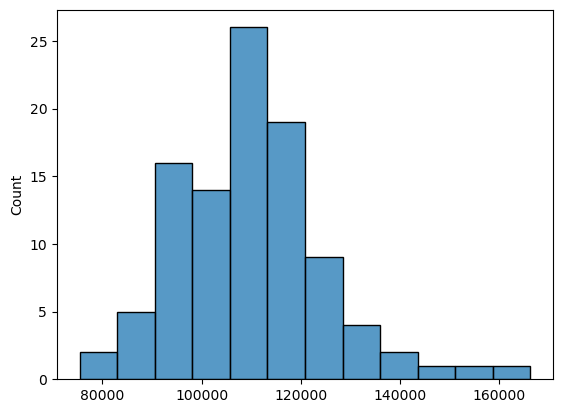

In [27]:
mse = []
for i in range(100):
    X_rand = np.random.randint(low=0, high=1000, size=(209, 4))
    Y_rand = np.random.randint(low=6, high=1150, size=209)
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rand, Y_rand, test_size=0.2, random_state=42)
    rgr.fit(Xr_train, yr_train)
    r_predict = rgr.predict(Xr_test)
    mse.append(((r_predict - yr_test)**2).mean())
sns.histplot(pd.Series(mse))

8. If you still have time, compute MSE using cross validation on the entire data set.  Do this 
many times and plot all the histogram values using a histogram.


<AxesSubplot: ylabel='Count'>

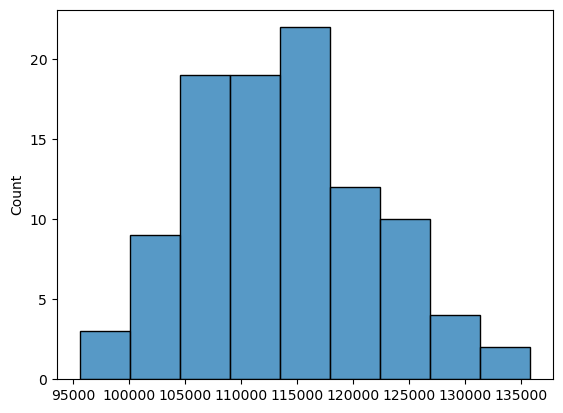

In [29]:
from sklearn.model_selection import cross_val_score
score = []
for i in range(100):
    X_rand = np.random.randint(low=0, high=1000, size=(209, 4))
    Y_rand = np.random.randint(low=6, high=1150, size=209)
    cv_rgr = LinearRegression()
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rand, Y_rand, test_size=0.2, random_state=42)
    scores = -cross_val_score(cv_rgr, Xr_train, yr_train,scoring="neg_mean_squared_error", cv=10 )
    score.append(scores.mean())
sns.histplot(pd.Series(score))

9. If you still have time, check out Section 5.1 of 'An Introduction to Statistical Learning'.
